# Devoir 3 pour IFT6390 - Fondements de l'apprentissage machine

### Par Olivier Malenfant-Thuot, Jimmy Leroux, Nicolas Laliberté
Matricules: 1012818, 1024610, 1005803

## Question 1 - Theoretical Part: Derivatives and relationships between basic functions

### 1.

\begin{equation}
\frac{1}{2}(\tanh(x/2)+1) = \frac{1}{2}(\frac{e^{x/2}-e^{-x/2}}{e^{x/2}+e^{-x/2}}+1) = \\
\frac{1}{2}(\frac{e^{x/2}-e^{-x/2}}{e^{x/2}+e^{-x/2}}+\frac{e^{x/2}+e^{-x/2}}{e^{x/2}+e^{-x/2}}) = \frac{1}{2}(\frac{2e^{x/2}}{e^{x/2}+e^{-x/2}}) = \frac{2e^{x/2}(e^{x/2}+e^{-x/2})}{(e^{x/2}+e^{-x/2})^2} = \\\frac{e^x+1}{e^x+2+e^{-x}} \times \frac{(e^x+1)^{-1}}{(e^x+1)^{-1}} = \frac{1}{1+e^{-x}} = \text{sigmoid}(x)
\end{equation}

### 2.

\begin{equation}
\ln(\text{sigmoid}(x)) = \ln(\frac{1}{1+e^{-x}}) = \ln(1) - \ln(1+e^{-x}) =\\ 0-\ln(1+e^{-x})=-\ln(1+e^{-x}) = -\text{softplus}(-x)
\end{equation}

### 3.

\begin{equation}
\frac{\partial}{\partial x}\text{sigmoid}(x) = \frac{\partial}{\partial x}\frac{1}{1+e^{-x}} = \\-(1+e^{-x})^{-2}(-e^{-x}) = \frac{e^{-x}}{(1+e^{-x})^2} = \frac{1}{1+e^{-x}}\frac{e^{-x}}{1+e^{-x}} = \\\frac{1}{1+e^{-x}}\frac{1-1+e^{-x}}{1+e^{-x}} = \frac{1}{1+e^{-x}}(\frac{1+e^{-x}}{1+e^{-x}} - \frac{1}{1+e^{-x}}) = \\\frac{1}{1+e^{-x}}(1-\frac{1}{1+e^{-x}}) =\text{sigmoid}(x) (1 - \text{sigmoid}(x))
\end{equation}

### 4.

\begin{equation}
\frac{\partial}{\partial x}(\tanh(x)) = \frac{\partial}{\partial x} (\frac{e^x - e^{-x}}{e^x + e^{-x}}) = \\\frac{e^x + e^{-x}}{e^x + e^{-x}} - (e^x - e^{-x})(e^x + e^{-x})^{-2}(e^x - e^{-x}) = 1 - (\frac{e^x - e^{-x}}{e^x + e^{-x}})^2 = 1 - \tanh(x)^2
\end{equation}

### 5.

\begin{equation}
\text{sign}(x) = 1_{x>0}(x) - 1_{x<0}(x)
\end{equation}

### 6.

\begin{equation}
\text{abs'}(x) = \text{sign(x)}
\end{equation}

### 7.

\begin{equation}
\text{rect'}(x) = 1_{x>0}(x)
\end{equation}

### 8.

\begin{equation}
\frac{\partial L_2}{\partial x} = \begin{bmatrix}\frac{\partial}{\partial x_1}\\
\frac{\partial}{\partial x_2}\\
\vdots \\
\frac{\partial}{\partial x_d}\end{bmatrix} L_2 = \begin{bmatrix}2x_1\\
2x_2\\
\vdots \\
2x_d\end{bmatrix}
\end{equation}

### 9.

\begin{equation}
\frac{\partial L_1}{\partial x} = \begin{bmatrix}\frac{\partial}{\partial x_1}\\
\frac{\partial}{\partial x_2}\\
\vdots \\
\frac{\partial}{\partial x_d}\end{bmatrix} L_1 = \begin{bmatrix}-1_{x<0}(x) + 1_{x>0}(x)\\
-1_{x<0}(x) + 1_{x>0}(x)\\
\vdots \\
-1_{x<0}(x) + 1_{x>0}(x)\end{bmatrix}
\end{equation}

## Question 2: Gradient computation for parameters optimization in a neural net for multiclass classification

### 1.
Le vecteur $b^{(1)}$ est de dimensions $d_h$.

Le vecteur de préactivation de la couche cachée est donné par

\begin{equation}
h^{(a)}(x) = b^{(1)} + W^{(1)}h^{(0)}(x)
\end{equation}

avec $h^{(0)}(x) = x$.

Pour calculer un élément particulier de rang $j$, on utilise

\begin{equation}
h^{(a)}_j(x) =  b^{(1)}_j + \sum\limits_{i = 1}^d W^{(1)}_{ji}x_i.
\end{equation}

Les éléments du  vecteur de sortie pour la couche cachée, $h^{(s)}(x)$ sont donnés par

\begin{equation}
h^{(s)}_j(x) = \max(0,h^{(a)}_j(x)).
\end{equation}

### 2.

Les dimensions de la matrice $W^{(2)}$ est $(m,d_h)$ et celles du vecteur $b^{(2)}$ sont $(m,1)$. La formule d'activation de la couche de sortie est donnée par

\begin{equation}
o^{(a)}(x) = b^{(2)} + W^{(2)}h^{(s)}(x).
\end{equation}

Chaque élément $o^{(a)}_k(x)$ de ce vecteur est donné par

\begin{equation}
o^{(a)}_k(x) = b^{(2)}_k + \sum\limits_{j = 1}^{d_h} W^{(2)}_{kj}h^{(s)}_j(x).
\end{equation}

### 3.

Les éléments du vecteur de sortie $o^{(s)}_k(x)$ sont donnés par

\begin{equation}
o^{(s)}_k(x) = \text{softmax}(o^{(a)}_k(x)) = \frac{e^{o^a_k}}{\sum_{k'} e^{o^{a}_{k'}}}
\end{equation}

Les $o^{(s)}_k(x)$ sont tous positifs, car $(\exp(x) > 0 \text{ pour } x \in \rm I\!R)$. La somme des termes de $o^{(s)}$ est donc $\frac{\sum_{k} e^{o^{a}_{k}}}{\sum_{k'} e^{o^{a}_{k'}}} = 1$.

### 4.

La fonction de perte est donnée par

\begin{equation}
L(x,y) = -\ln(o^s_y) = -o^a_y + \ln(\sum_k e^{o^{a}_k}),\\
L(x,y) = -onehot_m(y) \cdot o^a + \ln(\sum_k e^{o^{a}_k}).
\end{equation}

### 5.

Le risque empirique $\hat{R}(x)$ du dataset $D_n$ est donné par

\begin{equation}
\hat{R}(\theta, D_n) = \frac{1}{n}\sum\limits_{x \in D_n} L(x,y).
\end{equation}

L'ensemble $\theta$ des paramètres du système est 

\begin{equation}
\theta = \{W^{(1)}, b^{(1)}, W^{(2)}, b^{(2)}\}.
\end{equation}

$W^{(1)}$ est de dimension $(d_h,d)$, $b^{(1)}$ est de dimension $d_h$, $W^{(2)}$ est de dimension $(m,d_h)$ et $b^{(2)}$ est de dimension $m$. Le nombre de paramètres scalaires total est donc $n_\theta = d_h(d+1) + m(d_h+1)$

Les valeurs de paramètres optimisées seront obtenues par

\begin{equation}
\theta^* = \text{argmin}_{\theta}(\hat{R}(\theta, D_n)).
\end{equation}

## 6.

L'équation pour le batch gradient descent est

\begin{equation}
\nabla(\theta) = \frac{\partial}{\partial \theta} \hat{R}(\theta, D_n),\\
\theta \leftarrow \theta - \eta\nabla(\theta).
\end{equation}

## 7.

\begin{equation}
\frac{\partial L}{\partial o^a} = \frac{\partial}{\partial o^a} (-onehot_m(y) \cdot o^a + \ln(\sum_k e^{o^{a}_k})) = \\-onehot_m(y) + \frac{\partial}{\partial o^a}(\ln\sum_k e^{o^a_k}) = -onehot_m(y) + \frac{1}{\sum_k e^{o^a_k}}\frac{\partial}{\partial o^a}(\sum_k e^{o^a_k}) = \\-onehot_m(y) + \frac{1}{\sum_k e^{o^a_k}}\begin{bmatrix} e^{o^a_1}\\e^{o^a_2}\\\vdots\\e^{o^a_m}\end{bmatrix} = -onehot_m(y) + o^s
\end{equation}

## 8.

```python
grad_oa = np.copy(os)
grad_oa[target == 1] -= 1
```

## 9.

\begin{equation}
\frac{\partial L}{\partial W^{(2)}_{kj}} = \frac{\partial L}{\partial o^{(a)}_{k}} \frac{\partial o^{(a)}_{k}}{\partial W^{(2)}_{kj}} = \frac{\partial L}{\partial o^{(a)}_{k}} h^{(s)}_j\\
\frac{\partial L}{\partial b^{(2)}_{k}} = \frac{\partial L}{\partial o^{(a)}_{k}} \frac{\partial o^{(a)}_{k}}{\partial b^{(2)}_{k}} = \frac{\partial L}{\partial o^{(a)}_{k}}
\end{equation}

## 10.

\begin{equation}
\frac{\partial L}{\partial W^{(2)}}_{m \times d_h} = \frac{\partial L}{\partial o^{a}}_{m \times 1} \cdot [h^{(s)}]^T_{1\times d_h}\\
\frac{\partial L}{\partial b^{(2)}}_{m \times 1} = \frac{\partial L}{\partial o^{(a)}}_{m \times 1}
\end{equation}

```python
grad_b2 = np.copy(grad_oa)
grad_W2 = grad_oa * hs.T
```

## 11.

\begin{equation}
\frac{\partial L}{\partial h^{(s)}_{j}} = \frac{\partial L}{\partial o^{(a)}_{k}} \frac{\partial o^{(a)}_{k}}{\partial h^{(s)}_{j}} = \frac{\partial L}{\partial o^{(a)}_{k}} W^{(2)}_{kj}
\end{equation}

## 12.

\begin{equation}
\frac{\partial L}{\partial h^{(s)}_{j}}_{d_h \times 1} = [W^{(2)}]^T_{d_h \times m} \cdot \frac{\partial L}{\partial o^{(a)}_{k}}_{m \times 1}
\end{equation}

~~~python
grad_hs = W2.T * grad_oa
~~~

## 13.

\begin{equation}
\frac{\partial L}{\partial h^{(a)}_{j}} = \frac{\partial L}{\partial h^{(s)}_{j}} \frac{\partial h^{(s)}_{j}}{\partial h^{(a)}_{j}} = \frac{\partial L}{\partial h^{(s)}_{j}} \cdot 1_{x>0}(h^{(a)}_j)
\end{equation}

## 14.

\begin{equation}
\frac{\partial L}{\partial h^{(a)}_{j}}_{d_h \times 1} = \frac{\partial L}{\partial h^{(s)}_{j}}_{d_h \times 1} \cdot 1_{x>0}(h^{(a)}_j)_{d_h \times 1}
\end{equation}

~~~python
rect = np.zeros(grad_hs.shape)
rect[ha>0] = 1
grad_ha = grad_hs * rect
~~~

## 15.

\begin{equation}
\frac{\partial L}{\partial W^{(1)}_{ji}} = \frac{\partial L}{\partial h^{(a)}_{j}} \frac{\partial h^{(a)}_{j}}{\partial W^{(1)}_{ji}} = \frac{\partial L}{\partial h^{(a)}_{j}} h_i^{(0)}\\
\frac{\partial L}{\partial b^{(1)}_{j}} = \frac{\partial L}{\partial h^{(a)}_{j}}
\end{equation}

## 16.

\begin{equation}
\frac{\partial L}{\partial W^{(1)}}_{d_h \times d} = \frac{\partial L}{\partial h^{(a)}}_{d_h\times 1} \cdot [h^{(0)}]^T_{1\times d}\\
\frac{\partial L}{\partial b^{(1)}}_{d_h\times 1} = \frac{\partial L}{\partial h^{(a)}}_{d_h\times 1}
\end{equation}

~~~python
grad_W1 = grad_ha * h0.T
grad_b1 = np.copy(grad_ha)
~~~

## 17.

\begin{equation}
\frac{\partial L}{\partial x_{i}} = \frac{\partial L}{\partial h^{(a)}_{j}} \frac{\partial h^{(a)}_{j}}{\partial h^{(0)}_i}\frac{\partial h^{(0)}_{i}}{\partial x_i} = \frac{\partial L}{\partial h^{(a)}_{j}} \cdot W^{(1)}_{ji} \cdot 1
\end{equation}

## 18.

L'ajout d'un terme de régularisation change seulement les gradients pour $W^{(1)}$ et $W^{(2)}$. Ils deviendront

\begin{equation}
\frac{\partial L}{\partial W^{(2)}}_{m \times d_h} = \frac{\partial L}{\partial o^{a}}_{m \times 1} \cdot [h^{(s)}]^T_{1\times d_h} + \lambda_{21}(-1_{x<0}(W^{(2)}) + 1_{x>0}(W^{(2)}))_{m\times d_h} + 2\lambda_{22}W^{(2)}_{m\times d_h}\\
\frac{\partial L}{\partial W^{(1)}}_{d_h \times d} = \frac{\partial L}{\partial h^{a}}_{d_h \times 1} \cdot [h^{(0)}]^T_{1\times d} + \lambda_{11}(-1_{x<0}(W^{(1)}) + 1_{x>0}(W^{(1)}))_{d_h\times d} + 2\lambda_{12}W^{(1)}_{d_h\times d}
\end{equation}

~~~python
grad_W2 = grad_oa * hs.T + lambda21 * np.sign(W2) + 2 * lambda22 * W2
grad_W1 = grad_ha * h0.T + lambda11 * np.sign(W1) + 2 * lambda12 * W1
~~~

## Question 3: Practical Part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils.mnist_reader as mnist_reader

In [2]:
class NeuralNetwork:
    """
    Implement the neural network with one hidden layer
    """

    def __init__(self, layers=[], lams=[0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
            minibatch_size=16):
        """
        Initialize the class attributes
        """

        self.layers = layers # Number of nodes per layers
        self.parameters = {} # Dictionnary of all the model parameters
        self.lams = lams # Regularization hyperparameters lams=[lam11,lam12,lam21,lam22]
        self.K = minibatch_size # Minibatch size
        self.initialize_parameters() # Parameters initialization
        
    def relu(self, X):
        return np.maximum(0, X)

    def softmax(self, X):
        max_ = X.max(axis=0)
        O_s = np.exp(X - max_) / np.sum(np.exp(X - max_), axis=0)
        return O_s
        
    def initialize_parameters(self):
        """
        Initialization of the model's parameters
        """
        
        num_layer = len(self.layers)
        for i in range(1, num_layer):
            n_c = 1./np.sqrt(self.layers[i])
            self.parameters["W" + str(i)] = np.ones((self.layers[i],
                self.layers[i-1])) * np.random.uniform(-n_c, n_c,
                    (self.layers[i],self.layers[i-1]))
            self.parameters["b" + str(i)] = np.zeros((self.layers[i],1))
        
    def train(self,x,target):
        self.h0 = x.reshape((self.input_dim,1))
        self.target = target.reshape((self.output_dim,1))
        self.fprop()
        self.bprop()
    
    def fprop(self, X):
        """
        Forward propagation method. It propagated X through the network.

        Parameters:
        -----------
        X: Input matrix we wish to propagate. Shape: (dim, num_exemple)

        Returns:
        cache: Dictionary of the intermediate cache at each step of the propagation.
        """

        h_a = np.dot(self.parameters["W1"], X) + self.parameters["b1"]
        h_s = self.relu(h_a)
        O_a = np.dot(self.parameters["W2"], h_s) + self.parameters["b2"]
        O_s = self.softmax(O_a)
        cache = {"h_a":h_a, "h_s":h_s, "O_a":O_a, "O_s":O_s, "X":X}
        return cache
        
    def bprop(self, cache, Y):
        """
        Method performing the backpropagation for the model.
        
        Parameters:
        -----------
        cache: Stored intermediate cache of the forward propagation pass.
        Y: Target cache (of the training set). Shape: (num_class, num_exemple)

        Returns:
        --------
        grads: Dictionary containing the gradients of the parameters.

        """

        grads = {}
        dO_a = cache["O_s"] - Y
        dW2 = np.mean(dO_a[:,None,:] * cache["h_s"][None,:,:], axis=2) +\
            2 * self.lams[3] * self.parameters["W2"] +\
            self.lams[2] * np.sign(self.parameters["W2"])
        db2 = np.mean(dO_a, axis=1, keepdims=True)
        dh_s = np.sum(dO_a[:,None,:] * self.parameters["W2"][:,:,None], axis=0)
        dh_a = dh_s * 1. * (cache["h_s"]>0)
        dW1 = np.mean(dh_a[:,None,:] * cache["X"][None,:,], axis=2) +\
            2 * self.lams[1] * self.parameters["W1"] +\
            self.lams[0] * np.sign(self.parameters["W1"])
        db1 = np.mean(dh_a, axis=1, keepdims=True)
        dx = np.sum(dh_a[:,None,:]*self.parameters["W1"][:,:,None], axis=0)
        grads = {"dW2":dW2, "dW1":dW1, "db2":db2, "db1":db1, "dx":dx}
        return grads

    def loss(self, X, Y, cache): 
        """
        Compute the loss value.
        """

        loss = np.sum(-np.log(cache["O_s"]+0.000001)*Y)
        loss += (self.lams[0] * np.sum(np.abs(self.parameters["W1"])) +\
            self.lams[2] * np.sum(np.abs(self.parameters["W2"])) +\
            self.lams[1] * np.sum(self.parameters["W1"]**2) +\
            self.lams[3] * np.sum(self.parameters["W2"]**2)) * X.shape[1]
        return loss
    
    def accuracy(self, X, Y):
        """
        Method evaluating the accuracy of the model.

        Parameters:
        -----------
        X: Input we wish to evaluate the performance on. Shape: (dim, num_exemple)
        Y: The respective target for each of the exemples.
            Shape: (num_class, num_exemple)
        
        Returns:
        --------
        acc: The accuracy of the model to predict the input X
        
        """

        pred = self.prediction(X)
        num_correct = float(np.sum(pred==np.argmax(Y, axis=0)))
        acc = num_correct/X.shape[1]
        return acc
    
    def grad_check(self, X, Y, totest):
        cache = self.fprop(X)
        grad = self.bprop(cache, Y)	
        epsilon = 0.000001
        dtest = np.zeros(grad["d"+totest].shape)

        for i in range(dtest.shape[0]):
            for j in range(dtest.shape[1]):
                self.parameters[totest][i,j] = self.parameters[totest][i,j] + epsilon
                cache = self.fprop(X)
                loss1 = self.loss(X, Y, cache)
                self.parameters[totest][i,j] = self.parameters[totest][i,j] - 2 * epsilon
                cache = self.fprop(X)
                loss2 = self.loss(X, Y, cache)
                dtest[i,j] = (loss1-loss2)/(2*epsilon)/X.shape[1]
                self.parameters[totest][i,j] = self.parameters[totest][i,j] + epsilon
        return dtest, grad["d"+totest]
    
    def to_minibatch(self, X, Y, seed = 10):
        np.random.seed(seed)
        inds = np.arange(X.shape[1])
        np.random.shuffle(inds)		
        random_x = X[:,inds] 
        random_y = Y[:,inds]
        complete_mini = X.shape[1] // self.K

        minibatch = []
        for i in range(complete_mini):
            mini_x = random_x[:,i * self.K:(i + 1) * self.K]
            mini_y = random_y[:,i * self.K:(i + 1) * self.K]
            minibatch.append((mini_x, mini_y))

        if X.shape[1]%self.K!=0:
            mini_x = random_x[:,complete_mini * self.K:]
            mini_y = random_y[:,complete_mini * self.K:]
            minibatch.append((mini_x, mini_y))
        return minibatch
    
    def train(self, dataset, num_epoch, lr=0.01, comp_err = "N"):
        acc_train = []
        acc_valid = []
        acc_test = []
        err_train = []
        err_valid = []
        err_test = []
        loss_train = 0.
        loss_valid = 0.
        loss_test = 0.
        for epoch in range(num_epoch):
            minibatch = self.to_minibatch(dataset.train_x, dataset.train_y, seed = epoch)			
            for mini in minibatch:
                mini_x = mini[0]
                mini_y = mini[1]
                cache = self.fprop(mini_x)
                grad = self.bprop(cache, mini_y)
                self.update_param(grad,(lr / (1 + 4 * epoch / num_epoch)))
            if comp_err == "Y":
                cache_train = self.fprop(dataset.train_x)
                cache_valid = self.fprop(dataset.valid_x)
                cache_test = self.fprop(dataset.test_x)
                loss_train = self.loss(dataset.train_x, dataset.train_y, cache_train)
                loss_valid = self.loss(dataset.valid_x, dataset.valid_y, cache_valid)
                loss_test 	= self.loss(dataset.test_x, dataset.test_y, cache_test)
                acc_train.append((1-self.accuracy(dataset.train_x, dataset.train_y))*100)
                acc_valid.append((1-self.accuracy(dataset.valid_x, dataset.valid_y))*100)
                acc_test.append((1-self.accuracy(dataset.test_x, dataset.test_y))*100)
                err_train.append(loss_train/float(dataset.train_x.shape[1]))
                err_valid.append(loss_valid/float(dataset.valid_x.shape[1]))
                err_test.append(loss_test/float(dataset.test_x.shape[1]))
        return acc_train, acc_valid, acc_test, err_train, err_valid, err_test

    def update_param(self, grad, lambda_):
        self.parameters["W1"] = self.parameters["W1"] - lambda_ * grad["dW1"]
        self.parameters["W2"] = self.parameters["W2"] - lambda_ * grad["dW2"]
        self.parameters["b1"] = self.parameters["b1"] - lambda_ * grad["db1"]
        self.parameters["b2"] = self.parameters["b2"] - lambda_ * grad["db2"]
        
    def prediction(self, X):
        pred = self.fprop(X)["O_s"]
        return np.argmax(pred, axis=0)
        
    def stupid_loop_grad_check(self, X, Y, toprint = "Y"):
        n = X.shape[1]
        dtest_W1 = np.zeros(self.parameters["W1"].shape)
        dtest_b1 = np.zeros(self.parameters["b1"].shape)
        dtest_W2 = np.zeros(self.parameters["W2"].shape)
        dtest_b2 = np.zeros(self.parameters["b2"].shape)
        
        grad_W1 = np.zeros(self.parameters["W1"].shape)
        grad_b1 = np.zeros(self.parameters["b1"].shape)
        grad_W2 = np.zeros(self.parameters["W2"].shape)
        grad_b2 = np.zeros(self.parameters["b2"].shape)
        
        for i in range(n):
            it_dtest_W1, it_grad_W1 = self.grad_check(X[:,[i]],Y[:,[i]], "W1")
            it_dtest_b1, it_grad_b1 = self.grad_check(X[:,[i]],Y[:,[i]], "b1")
            it_dtest_W2, it_grad_W2 = self.grad_check(X[:,[i]],Y[:,[i]], "W2")
            it_dtest_b2, it_grad_b2 = self.grad_check(X[:,[i]],Y[:,[i]], "b2")

            dtest_W1 += it_dtest_W1
            dtest_b1 += it_dtest_b1
            dtest_W2 += it_dtest_W2
            dtest_b2 += it_dtest_b2
            
            grad_W1 += it_grad_W1
            grad_b1 += it_grad_b1
            grad_W2 += it_grad_W2
            grad_b2 += it_grad_b2

        dtest_W1 /= n
        dtest_b1 /= n
        dtest_W2 /= n
        dtest_b2 /= n

        grad_W1 /= n
        grad_b1 /= n
        grad_W2 /= n
        grad_b2 /= n

        if toprint == "Y":
            print("Compare the finite difference with the direct computation of the gradient on a minibatch of size " + str(n) + ":\n")

            print("Gradient with respect to W1:")
            print("Gradient:\t\t" + str(grad_W1.flatten()))
            print("Finite difference:\t" + str(dtest_W1.flatten()))
            print("\n")

            print("Gradient with respect to b1:")
            print("Gradient:\t\t" + str(grad_b1.flatten()))
            print("Finite difference:\t" + str(dtest_b1.flatten()))
            print("\n")	

            print("Gradient with respect to W2:")
            print("Gradient:\t\t" + str(grad_W2.flatten()))
            print("Finite difference:\t" + str(dtest_W2.flatten()))
            print("\n")

            print("Gradient with respect to b2:")
            print("Gradient:\t\t" + str(grad_b2.flatten()))
            print("Finite difference:\t" + str(dtest_b2.flatten()))	   
            print("\n")
        return grad_W1, grad_b1, grad_W2, grad_b2
    
    def stupid_hyper_loop(self, dataset, num_epoch, lr=0.05):
        acc_train = []
        acc_test = []
        for epoch in range(num_epoch):
            minibatch = self.to_minibatch(dataset.train_x, dataset.train_y, seed = epoch)
            loss = 0
            for mini in minibatch:
                grad = {}
                grad["dW1"] = np.zeros(self.parameters["W1"].shape)
                grad["db1"] = np.zeros(self.parameters["b1"].shape)
                grad["dW2"] = np.zeros(self.parameters["W2"].shape)
                grad["db2"] = np.zeros(self.parameters["b2"].shape)
                mini_x = mini[0]
                mini_y = mini[1]
                for i in range(mini_x.shape[1]):
                    cache = self.fprop(mini_x[:,[i]])
                    grad["dW1"] += self.bprop(cache, mini_y[:,[i]])["dW1"]
                    grad["db1"] += self.bprop(cache, mini_y[:,[i]])["db1"]
                    grad["dW2"] += self.bprop(cache, mini_y[:,[i]])["dW2"]
                    grad["db2"] += self.bprop(cache, mini_y[:,[i]])["db2"]
                    loss += self.loss(mini_x[:,[i]], mini_y[:,[i]], cache)
                grad["dW1"] /= mini_x.shape[1]
                grad["db1"] /= mini_x.shape[1]
                grad["dW2"] /= mini_x.shape[1]
                grad["db2"] /= mini_x.shape[1]
                self.update_param(grad,(lr / (1 + 4 * epoch / num_epoch)))
            acc_train.append(1-self.accuracy(dataset.train_x, dataset.train_y))
            acc_test.append(1-self.accuracy(dataset.test_x, dataset.test_y))
        return grad

In [3]:
class dataset:
    def __init__(self,X,Y,numclass):
        self.X = X.T
        self.Y = Y
        self.train_x = 0
        self.train_y = 0
        self.valid_x = 0
        self.valid_y = 0
        self.test_x = 0
        self.test_y = 0	
        self.numclass = numclass
        self.toonehot()
        self.split_and_randomize()

    def toonehot(self):	
        onehot = np.zeros((self.numclass,len(self.Y)))
        for j in range(len(self.Y)):
            onehot[int(self.Y[j]),j] = 1.
        self.Y = onehot

    def split_and_randomize(self):
        n_train = int(0.70 * self.X.shape[1])
        n_valid = int(0.15 * self.X.shape[1])
        inds = np.arange(self.X.shape[1])
        np.random.shuffle(inds)
        train_inds = inds[:n_train]
        valid_inds = inds[n_train:n_train+n_valid]
        test_inds = inds[n_train+n_valid:]
        self.train_x = self.X[:,train_inds]
        self.train_y = self.Y[:,train_inds]
        mean_train = self.train_x.mean(axis=1, keepdims=True)
        std_train = self.train_x.std(axis=1, keepdims=True)
        self.train_x = (self.train_x - mean_train) / std_train
        self.valid_x = (self.X[:,valid_inds] - mean_train) / std_train
        self.valid_y = self.Y[:,valid_inds]
        self.test_x = (self.X[:,test_inds] - mean_train) / std_train
        self.test_y = self.Y[:,test_inds]

### Question 3.2

In [4]:
#Import cercles data
data = np.loadtxt("cercles.txt")
data = dataset(data[:,:-1], 1. * (data[:,-1]>0), 2)

In [5]:
exp_NN = NeuralNetwork(layers=[2,2,2],
        lams=[0.001,0.001,0.001,0.001])

In [6]:
exp_NN.stupid_loop_grad_check(data.train_x[:,[1]], data.train_y[:,[1]])

Compare the finite difference with the direct computation of the gradient on a minibatch of size 1:

Gradient with respect to W1:
Gradient:		[ 0.53615986 -0.61532255 -0.00232139  0.00177073]
Finite difference:	[ 0.53615836 -0.61532084 -0.00232139  0.00177073]


Gradient with respect to b1:
Gradient:		[0.63912522 0.        ]
Finite difference:	[0.63912344 0.        ]


Gradient with respect to W2:
Gradient:		[ 0.38025893 -0.00156965 -0.37971948 -0.00239594]
Finite difference:	[ 0.38025788 -0.00156965 -0.37971842 -0.00239594]


Gradient with respect to b2:
Gradient:		[ 0.64233746 -0.64233746]
Finite difference:	[ 0.64233566 -0.64233566]




(array([[ 0.53615986, -0.61532255],
        [-0.00232139,  0.00177073]]), array([[0.63912522],
        [0.        ]]), array([[ 0.38025893, -0.00156965],
        [-0.37971948, -0.00239594]]), array([[ 0.64233746],
        [-0.64233746]]))

### Question 3.4

In [7]:
exp_NN.K = 10

minibatch = exp_NN.to_minibatch(data.train_x, data.train_y)
mini_x = minibatch[0][0]
mini_y = minibatch[0][1]
exp_NN.stupid_loop_grad_check(mini_x, mini_y)

Compare the finite difference with the direct computation of the gradient on a minibatch of size 10:

Gradient with respect to W1:
Gradient:		[ 0.06274614  0.05305701 -0.06113185  0.02728518]
Finite difference:	[ 0.06274599  0.0530569  -0.06113169  0.02728511]


Gradient with respect to b1:
Gradient:		[0.07555138 0.05970727]
Finite difference:	[0.07555119 0.05970711]


Gradient with respect to W2:
Gradient:		[ 0.00426283  0.11627707 -0.00372337 -0.12024266]
Finite difference:	[ 0.00426281  0.11627675 -0.00372336 -0.12024234]


Gradient with respect to b2:
Gradient:		[ 0.16338478 -0.16338478]
Finite difference:	[ 0.16338431 -0.16338431]




(array([[ 0.06274614,  0.05305701],
        [-0.06113185,  0.02728518]]), array([[0.07555138],
        [0.05970727]]), array([[ 0.00426283,  0.11627707],
        [-0.00372337, -0.12024266]]), array([[ 0.16338478],
        [-0.16338478]]))

### Question 3.5

In [9]:
plt.rcParams.update({'font.size': 12})

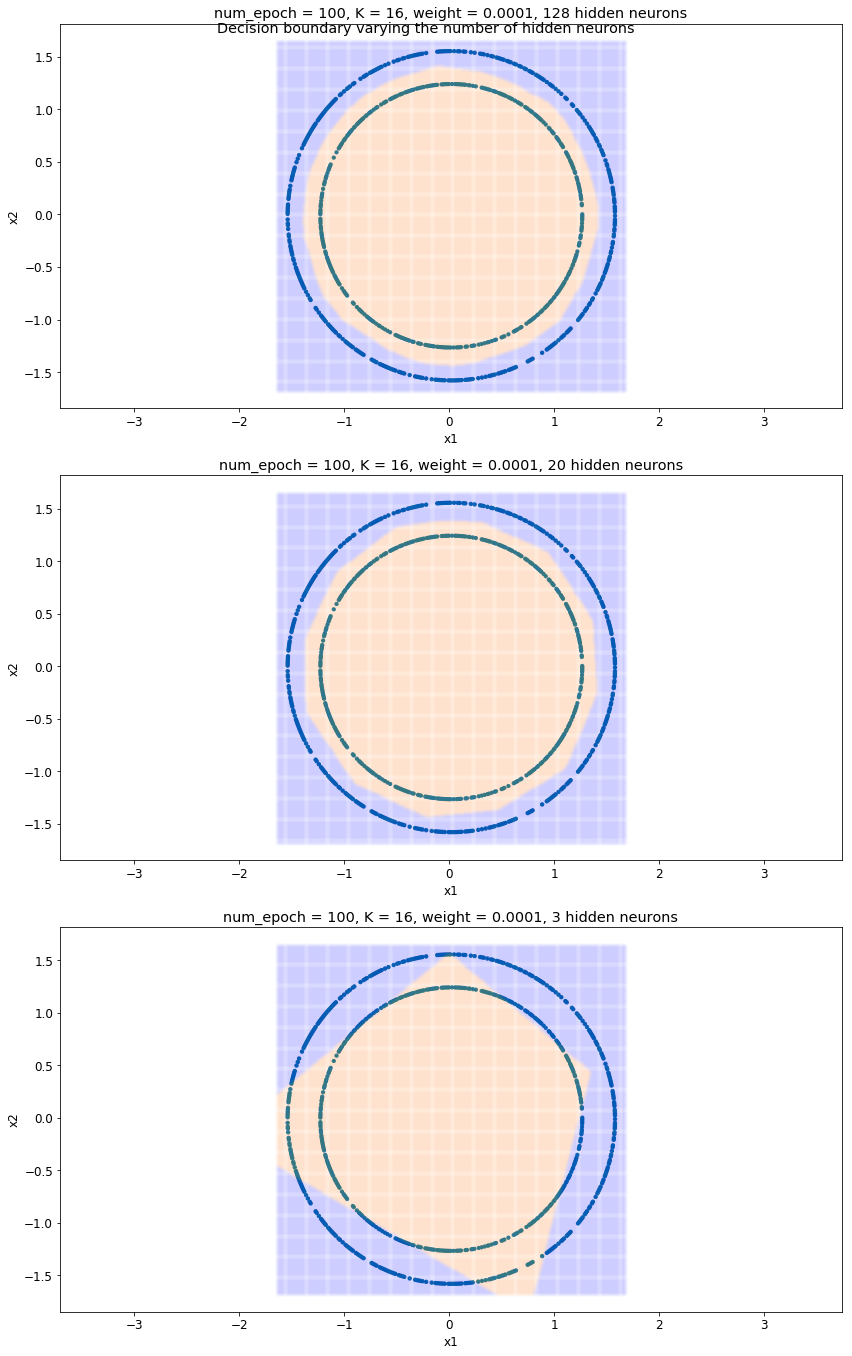

In [22]:
min_x1 = np.min(data.train_x, axis = 1)[0]-0.1
min_x2 = np.min(data.train_x, axis = 1)[1]-0.1
max_x1 = np.max(data.train_x, axis = 1)[0]+0.1
max_x2 = np.max(data.train_x, axis = 1)[1]+0.1
precision_mesh = 0.01

x1_mesh = np.arange(min_x1, max_x1, precision_mesh)
x2_mesh = np.arange(min_x2, max_x2, precision_mesh)
mesh_grid = np.meshgrid(x1_mesh, x2_mesh)
grid_x1 = mesh_grid[0].ravel()
grid_x2 = mesh_grid[1].ravel()
grid = np.array([grid_x1, grid_x2])

fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(12,19))
ax1, ax2, ax3 = ax.flatten()

fig.suptitle('Decision boundary varying the number of hidden neurons')

exp_NN = NeuralNetwork(layers=[2,128,2], lams=[0.0001, 0.0001, 0.0001, 0.0001], minibatch_size = 16)
exp_NN.train(data, num_epoch = 30, lr = 0.5)

y = np.array(exp_NN.prediction(grid))
prediction_grid = np.array([grid_x1, grid_x2, y])
data_0 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 0.])
data_1 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 1.])

ax1.set_title("num_epoch = 100, K = 16, weight = 0.0001, 128 hidden neurons")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_xlim((min_x1, max_x1))
ax1.set_ylim((min_x1, max_x2))

if len(data_0) > 0:
    ax1.plot(data_0[:,0], data_0[:,1],"o", markersize = 4, color = 'b', alpha = 0.008, label='Target 0')
if len(data_1) > 0:
    ax1.plot(data_1[:,0], data_1[:,1],"o", markersize = 4, color = 'orange', alpha = 0.008, label='Target 1')
ax1.scatter(data.train_x[0], data.train_x[1], data.train_y[0] + 10)
ax1.axis("equal")

exp_NN = NeuralNetwork(layers=[2,20,2], lams=[0.0001, 0.0001, 0.0001, 0.0001], minibatch_size = 16)
exp_NN.train(data, num_epoch = 30, lr = 0.5)

y = np.array(exp_NN.prediction(grid))
prediction_grid = np.array([grid_x1, grid_x2, y])
data_0 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 0.])
data_1 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 1.])

ax2.set_title("num_epoch = 100, K = 16, weight = 0.0001, 20 hidden neurons")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_xlim((min_x1, max_x1))
ax2.set_ylim((min_x1, max_x2))

if len(data_0) > 0:
    ax2.plot(data_0[:,0], data_0[:,1],"o", markersize = 4, color = 'b', alpha = 0.008, label='Target 0')
if len(data_1) > 0:
    ax2.plot(data_1[:,0], data_1[:,1],"o", markersize = 4, color = 'orange', alpha = 0.008, label='Target 1')
ax2.scatter(data.train_x[0], data.train_x[1], data.train_y[0] + 10)
ax2.axis("equal")

exp_NN = NeuralNetwork(layers=[2,3,2], lams=[0.0001, 0.0001, 0.0001, 0.0001], minibatch_size = 16)
exp_NN.train(data, num_epoch = 30, lr = 0.5)

y = np.array(exp_NN.prediction(grid))
prediction_grid = np.array([grid_x1, grid_x2, y])
data_0 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 0.])
data_1 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 1.])

ax3.set_title("num_epoch = 100, K = 16, weight = 0.0001, 3 hidden neurons")
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")
ax3.set_xlim((min_x1, max_x1))
ax3.set_ylim((min_x1, max_x2))

if len(data_0) > 0:
    ax3.plot(data_0[:,0], data_0[:,1],"o", markersize = 4, color = 'b', alpha = 0.008, label='Target 0')
if len(data_1) > 0:
    ax3.plot(data_1[:,0], data_1[:,1],"o", markersize = 4, color = 'orange', alpha = 0.008, label='Target 1')
ax3.scatter(data.train_x[0], data.train_x[1], data.train_y[0] + 10)
ax3.axis("equal")
fig.tight_layout()

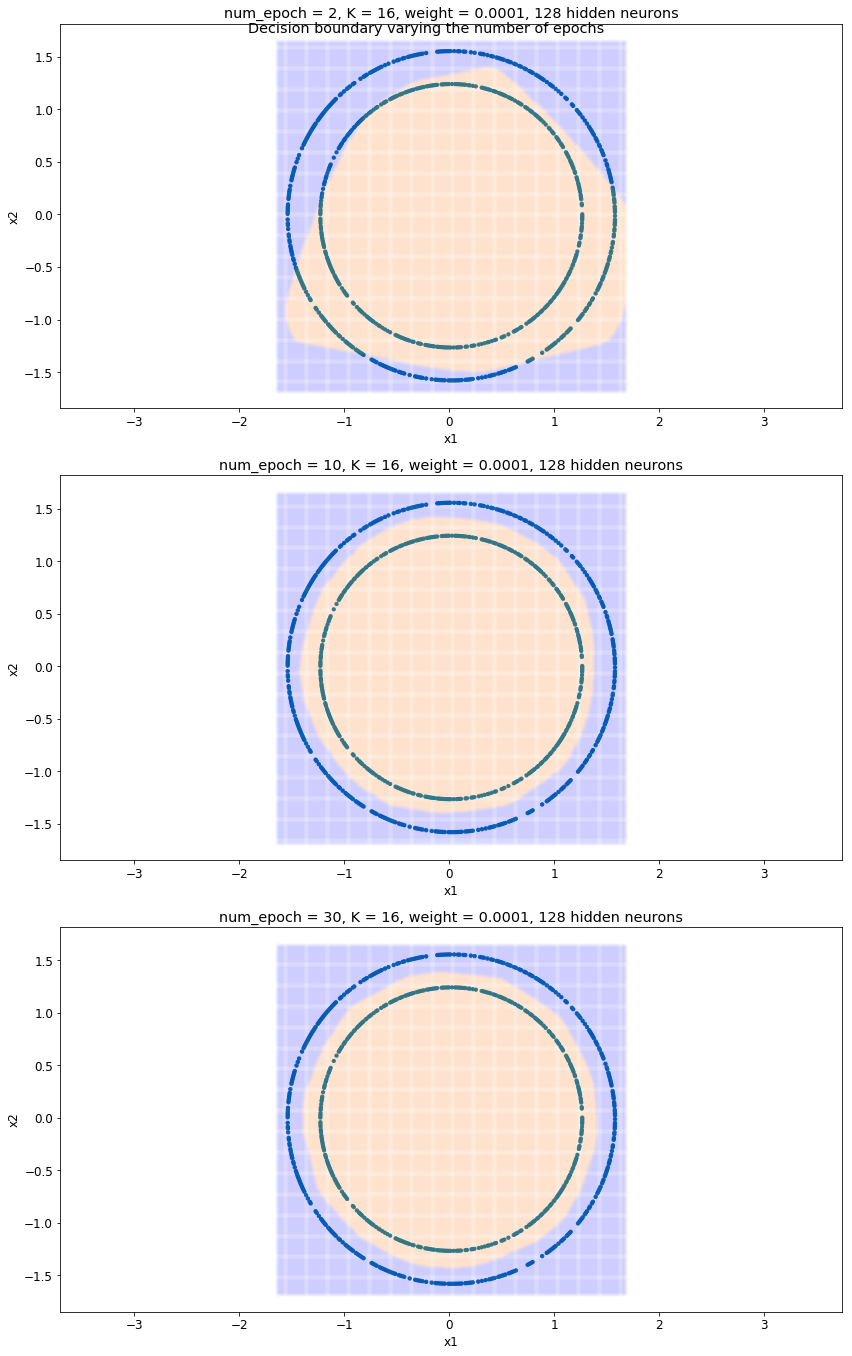

In [21]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(12,19))
ax1, ax2, ax3 = ax.flatten()

fig.suptitle('Decision boundary varying the number of epochs')

exp_NN = NeuralNetwork(layers=[2,128,2], lams=[0.0001, 0.0001, 0.0001, 0.0001], minibatch_size = 16)
exp_NN.train(data, num_epoch = 2, lr = 0.5)

y = np.array(exp_NN.prediction(grid))
prediction_grid = np.array([grid_x1, grid_x2, y])
data_0 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 0.])
data_1 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 1.])

ax1.set_title("num_epoch = 2, K = 16, weight = 0.0001, 128 hidden neurons")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_xlim((min_x1, max_x1))
ax1.set_ylim((min_x1, max_x2))

if len(data_0) > 0:
    ax1.plot(data_0[:,0], data_0[:,1],"o", markersize = 4, color = 'b', alpha = 0.008, label='Target 0')
if len(data_1) > 0:
    ax1.plot(data_1[:,0], data_1[:,1],"o", markersize = 4, color = 'orange', alpha = 0.008, label='Target 1')
ax1.scatter(data.train_x[0], data.train_x[1], data.train_y[0] + 10)
ax1.axis("equal")

exp_NN = NeuralNetwork(layers=[2,128,2], lams=[0.0001, 0.0001, 0.0001, 0.0001], minibatch_size = 16)
exp_NN.train(data, num_epoch = 10, lr = 0.5)

y = np.array(exp_NN.prediction(grid))
prediction_grid = np.array([grid_x1, grid_x2, y])
data_0 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 0.])
data_1 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 1.])

ax2.set_title("num_epoch = 10, K = 16, weight = 0.0001, 128 hidden neurons")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_xlim((min_x1, max_x1))
ax2.set_ylim((min_x1, max_x2))

if len(data_0) > 0:
    ax2.plot(data_0[:,0], data_0[:,1],"o", markersize = 4, color = 'b', alpha = 0.008, label='Target 0')
if len(data_1) > 0:
    ax2.plot(data_1[:,0], data_1[:,1],"o", markersize = 4, color = 'orange', alpha = 0.008, label='Target 1')
ax2.scatter(data.train_x[0], data.train_x[1], data.train_y[0] + 10)
ax2.axis("equal")

exp_NN = NeuralNetwork(layers=[2,128,2], lams=[0.0001, 0.0001, 0.0001, 0.0001], minibatch_size = 16)
exp_NN.train(data, num_epoch = 30, lr = 0.5)

y = np.array(exp_NN.prediction(grid))
prediction_grid = np.array([grid_x1, grid_x2, y])
data_0 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 0.])
data_1 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 1.])

ax3.set_title("num_epoch = 30, K = 16, weight = 0.0001, 128 hidden neurons")
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")
ax3.set_xlim((min_x1, max_x1))
ax3.set_ylim((min_x1, max_x2))

if len(data_0) > 0:
    ax3.plot(data_0[:,0], data_0[:,1],"o", markersize = 4, color = 'b', alpha = 0.008, label='Target 0')
if len(data_1) > 0:
    ax3.plot(data_1[:,0], data_1[:,1],"o", markersize = 4, color = 'orange', alpha = 0.008, label='Target 1')
ax3.scatter(data.train_x[0], data.train_x[1], data.train_y[0] + 10)
ax3.axis("equal")
fig.tight_layout()

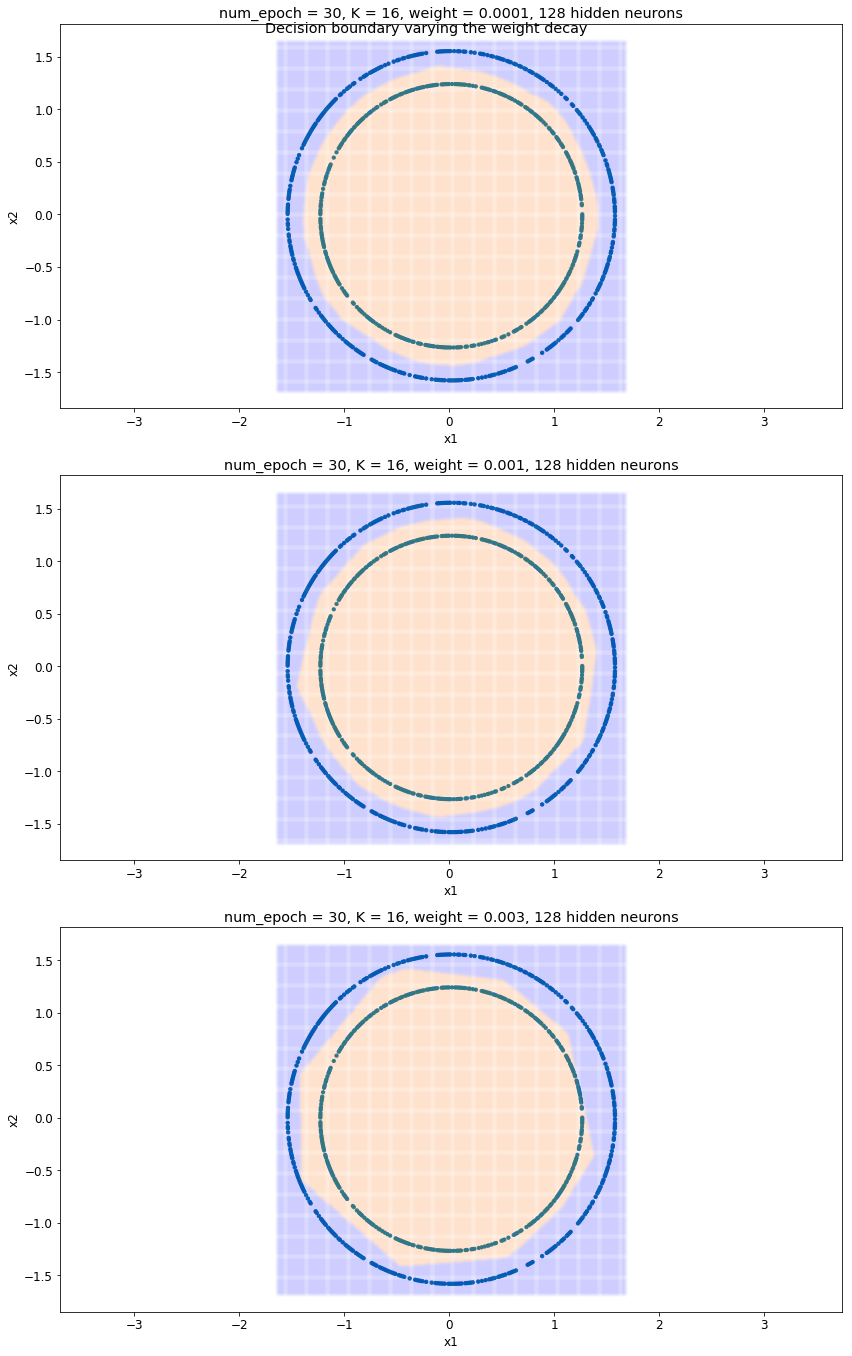

In [23]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(12,19))
ax1, ax2, ax3 = ax.flatten()

fig.suptitle('Decision boundary varying the weight decay')

exp_NN = NeuralNetwork(layers=[2,128,2], lams=[0.0001, 0.0001, 0.0001, 0.0001], minibatch_size = 16)
exp_NN.train(data, num_epoch = 30, lr = 0.5)

y = np.array(exp_NN.prediction(grid))
prediction_grid = np.array([grid_x1, grid_x2, y])
data_0 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 0.])
data_1 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 1.])

ax1.set_title("num_epoch = 30, K = 16, weight = 0.0001, 128 hidden neurons")
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_xlim((min_x1, max_x1))
ax1.set_ylim((min_x1, max_x2))

if len(data_0) > 0:
    ax1.plot(data_0[:,0], data_0[:,1],"o", markersize = 4, color = 'b', alpha = 0.008, label='Target 0')
if len(data_1) > 0:
    ax1.plot(data_1[:,0], data_1[:,1],"o", markersize = 4, color = 'orange', alpha = 0.008, label='Target 1')
ax1.scatter(data.train_x[0], data.train_x[1], data.train_y[0] + 10)
ax1.axis("equal")

exp_NN = NeuralNetwork(layers=[2,128,2], lams=[0.001, 0.001, 0.001, 0.001], minibatch_size = 16)
exp_NN.train(data, num_epoch = 30, lr = 0.5)

y = np.array(exp_NN.prediction(grid))
prediction_grid = np.array([grid_x1, grid_x2, y])
data_0 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 0.])
data_1 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 1.])

ax2.set_title("num_epoch = 30, K = 16, weight = 0.001, 128 hidden neurons")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_xlim((min_x1, max_x1))
ax2.set_ylim((min_x1, max_x2))

if len(data_0) > 0:
    ax2.plot(data_0[:,0], data_0[:,1],"o", markersize = 4, color = 'b', alpha = 0.008, label='Target 0')
if len(data_1) > 0:
    ax2.plot(data_1[:,0], data_1[:,1],"o", markersize = 4, color = 'orange', alpha = 0.008, label='Target 1')
ax2.scatter(data.train_x[0], data.train_x[1], data.train_y[0] + 10)
ax2.axis("equal")

exp_NN = NeuralNetwork(layers=[2,128,2], lams=[0.003, 0.003, 0.003, 0.003], minibatch_size = 16)
exp_NN.train(data, num_epoch = 30, lr = 0.5)

y = np.array(exp_NN.prediction(grid))
prediction_grid = np.array([grid_x1, grid_x2, y])
data_0 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 0.])
data_1 = np.array([prediction_grid[:-1,i] for i in range(prediction_grid.shape[1]) if prediction_grid[2,i] == 1.])

ax3.set_title("num_epoch = 30, K = 16, weight = 0.003, 128 hidden neurons")
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")
ax3.set_xlim((min_x1, max_x1))
ax3.set_ylim((min_x1, max_x2))

if len(data_0) > 0:
    ax3.plot(data_0[:,0], data_0[:,1],"o", markersize = 4, color = 'b', alpha = 0.008, label='Target 0')
if len(data_1) > 0:
    ax3.plot(data_1[:,0], data_1[:,1],"o", markersize = 4, color = 'orange', alpha = 0.008, label='Target 1')
ax3.scatter(data.train_x[0], data.train_x[1], data.train_y[0] + 10)
ax3.axis("equal")
fig.tight_layout()

### Question 3.7

In [13]:
exp_NN = NeuralNetwork(layers=[2,2,2], lams=[0.001,0.001,0.001,0.001], minibatch_size = 1)

minibatch = exp_NN.to_minibatch(data.train_x, data.train_y)
mini_x = minibatch[0][0]
mini_y = minibatch[0][1]

grad_W1, grad_b1, grad_W2, grad_b2 = exp_NN.stupid_loop_grad_check(mini_x, mini_y, toprint = 'N')
cache = exp_NN.fprop(mini_x)
mat_grad = exp_NN.bprop(cache, mini_y)

print("Gradient with loop implementation for minibatch of size K = " + str(exp_NN.K) + ": \n")
print("Gradient with respect to W1:")
print(grad_W1.flatten())
print("\n")

print("Gradient with respect to b1:")
print(grad_b1.flatten())
print("\n")

print("Gradient with respect to W2:")
print(grad_W2.flatten())
print("\n")

print("Gradient with respect to b2:")
print(grad_b2.flatten())
print("\n")

print("Gradient with matrix implementation for minibatch of size K = " + str(exp_NN.K) + ": \n")
print("Gradient with respect to W1:")
print(mat_grad["dW1"].flatten())
print("\n")

print("Gradient with respect to b1:")
print(mat_grad["db1"].flatten())
print("\n")

print("Gradient with respect to W2:")
print(mat_grad["dW2"].flatten())
print("\n")

print("Gradient with respect to b2:")
print(mat_grad["db2"].flatten())
print("\n")

exp_NN = NeuralNetwork(layers=[2,2,2], lams=[0.001,0.001,0.001,0.001], minibatch_size = 10)

minibatch = exp_NN.to_minibatch(data.train_x, data.train_y)
mini_x = minibatch[0][0]
mini_y = minibatch[0][1]

grad_W1, grad_b1, grad_W2, grad_b2 = exp_NN.stupid_loop_grad_check(mini_x, mini_y, toprint = "N")
cache = exp_NN.fprop(mini_x)
mat_grad = exp_NN.bprop(cache, mini_y)

print("Gradient with loop implementation for minibatch of size K = " + str(exp_NN.K) + ": \n")
print("Gradient with respect to W1:")
print(grad_W1.flatten())
print("\n")

print("Gradient with respect to b1:")
print(grad_b1.flatten())
print("\n")

print("Gradient with respect to W2:")
print(grad_W2.flatten())
print("\n")

print("Gradient with respect to b2:")
print(grad_b2.flatten())
print("\n")

print("Gradient with matrix implementation for minibatch of size K = " + str(exp_NN.K) + ": \n")
print("Gradient with respect to W1:")
print(mat_grad["dW1"].flatten())
print("\n")

print("Gradient with respect to b1:")
print(mat_grad["db1"].flatten())
print("\n")

print("Gradient with respect to W2:")
print(mat_grad["dW2"].flatten())
print("\n")

print("Gradient with respect to b2:")
print(mat_grad["db2"].flatten())
print("\n")

Gradient with loop implementation for minibatch of size K = 1: 

Gradient with respect to W1:
[-0.00134586  0.00147299 -0.0394731   0.24620417]


Gradient with respect to b1:
[ 0.         -0.16073051]


Gradient with respect to W2:
[-0.00220387 -0.25934053 -0.00155406  0.26262649]


Gradient with respect to b2:
[-0.44782728  0.44782728]


Gradient with matrix implementation for minibatch of size K = 1: 

Gradient with respect to W1:
[-0.00134586  0.00147299 -0.0394731   0.24620417]


Gradient with respect to b1:
[ 0.         -0.16073051]


Gradient with respect to W2:
[-0.00220387 -0.25934053 -0.00155406  0.26262649]


Gradient with respect to b2:
[-0.44782728  0.44782728]


Gradient with loop implementation for minibatch of size K = 10: 

Gradient with respect to W1:
[ 0.00865705 -0.01492388 -0.03471853 -0.0019957 ]


Gradient with respect to b1:
[-0.01527777  0.02943983]


Gradient with respect to W2:
[ 0.0150552   0.01664666 -0.01881314 -0.0133607 ]


Gradient with respect to b2:
[ 

### Question 3.8

In [15]:
import time

In [17]:
X_train, y_train = mnist_reader.load_mnist('fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion', kind='t10k')
X = np.concatenate((np.array(X_train), np.array(X_test)), axis=0)
Y = np.concatenate((np.array(y_train), np.array(y_test)), axis=0)
mnist = dataset(X/255., Y, 10)

exp_NN = NeuralNetwork(layers=[784,64,10] , lams=[0.001, 0.001, 0.001, 0.001], minibatch_size = 20)

t1 = time.time()

exp_NN.stupid_hyper_loop(mnist, num_epoch = 1)

print("It took " + str(time.time() - t1) + " seconds to train the NN with the loop implementation \n")

t2 = time.time()

exp_NN.train(mnist, num_epoch = 1)

print("It took " + str(time.time() - t2) + " seconds to train the NN with the matrix implementation \n")

Question 8: 

It tooks 147.6519923210144 seconds to train the NN with the loop implementation 

It tooks 12.958545684814453 seconds to train the NN with the matrix implementation 



### Question 3.9 - 3.10

In [23]:
NN = NeuralNetwork(layers=[784, 64, 10], minibatch_size=32,
        lams=[0.0001,0.0001,0.0001,0.0001])

acc_train, acc_valid, acc_test, err_train, err_valid, err_test = NN.train(
    mnist, num_epoch=30, lr=0.1, comp_err = "Y")
pred = NN.prediction(mnist.train_x)

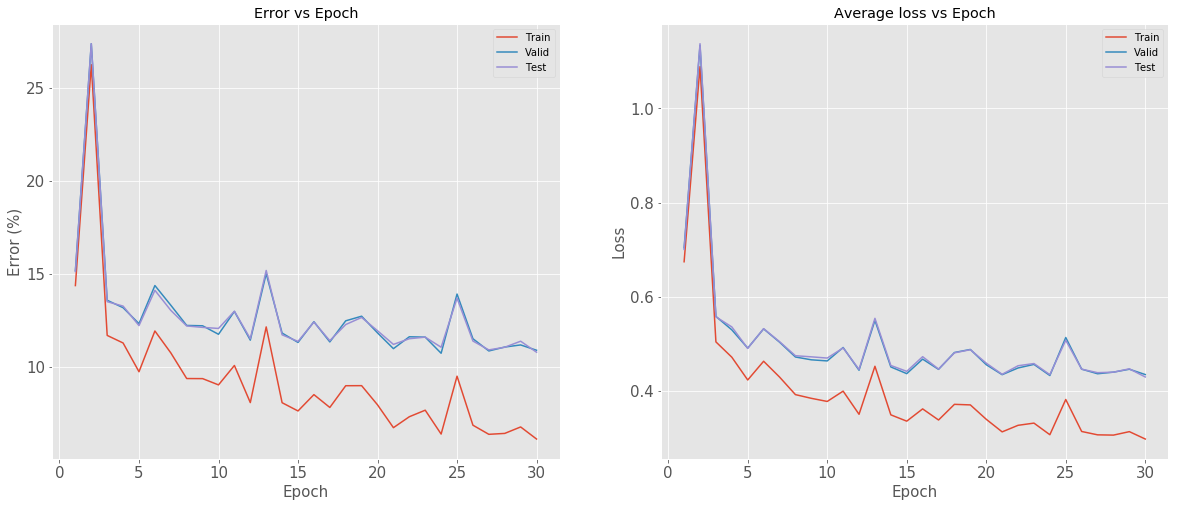

In [24]:
plt.style.use('ggplot')	
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
ax1, ax2 = ax.flatten()

ax1.set_title("Error vs Epoch")
ax1.plot(range(1,31), acc_train, label="Train")
ax1.plot(range(1,31), acc_valid, label="Valid")
ax1.plot(range(1,31), acc_test, label="Test")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Error (%)")
ax1.legend()

ax2.set_title("Average loss vs Epoch")
ax2.plot(range(1,31), err_train, label="Train")
ax2.plot(range(1,31), err_valid, label="Valid")
ax2.plot(range(1,31), err_test, label="Test")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend()
plt.show()